In [11]:
# Import the libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [12]:
# read in your api key
with open('secret_api.json', 'r') as f:
    secrets = json.load(f)

In [13]:
# assigning my api key to the variable api_key
api_key = secrets['api_key']

In [17]:
# creating a class that will interact with Fred API

class FredPy:

    def __init__(self, token= None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
                    "?series_id={seriesID}&api_key={key}&file_type=json" + \
                    "&observation_start={start}&observation_end={end}&units={units}"
        
    
    def set_token(self, token):
        self.token = token

    
    def get_series(self, seriesID, start, end, units):

        # All this variables are to be inserted in the placeholder in the url
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )

        response = requests.get(url_formatted)

        if(self.token):
            # If the response was successful, extract the data from it
            if(response.status_code == 200):
                data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                        .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                        .assign(value = lambda cols: cols['value'].astype(float))\
                        .rename(columns= {'value': seriesID})
                
                return data
            
            else:
                raise Exception("Bad response from API, status code = {}".format(response.status_code))

        else:
            raise Exception("You did not specify an API key.")

In [20]:
# Instantiate fredpy object
fredpy = FredPy()

# Set the API key
fredpy.set_token(api_key)

# Test getting the GDP series
gdp_data = fredpy.get_series(
    seriesID = 'GDP', 
    start = '2005-01-01',
    end = '2021-12-01', 
    units = 'pc1'
)

In [21]:
gdp_data

,date,GDP
0,2005-01-01,7.07714
1,2005-04-01,6.68582
2,2005-07-01,6.80467
3,2005-10-01,6.36207
4,2006-01-01,6.51567
...,...,...
63,2020-10-01,0.55753
64,2021-01-01,4.11707
65,2021-04-01,16.96979
66,2021-07-01,10.07654


In [22]:
# Now checking the data with different seriesID
# Checking for "UNRATE" which denotes the unemployment rate data
unemployment_data = fredpy.get_series(
    seriesID="UNRATE", 
    start = '2005-01-01',
    end = '2021-12-01', 
    units = 'lin'
)

In [23]:
unemployment_data

,date,UNRATE
0,2005-01-01,5.3
1,2005-02-01,5.4
2,2005-03-01,5.2
3,2005-04-01,5.2
4,2005-05-01,5.1
...,...,...
199,2021-08-01,5.1
200,2021-09-01,4.7
201,2021-10-01,4.5
202,2021-11-01,4.1


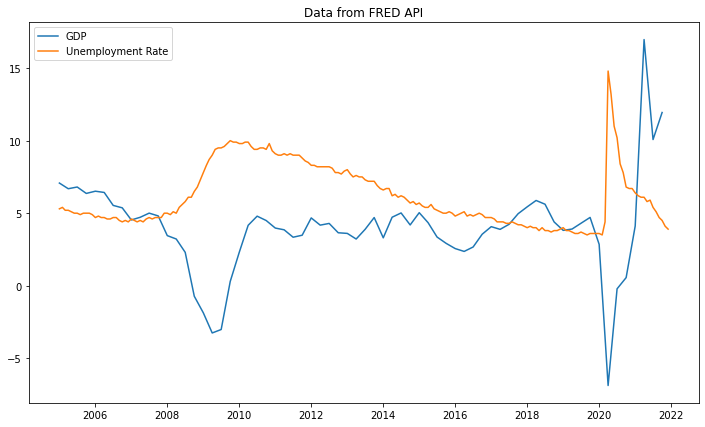

In [24]:
# Graphical representation of the gdp and unemployment data
plt.figure(figsize = (12, 7))
plt.plot(gdp_data['date'], gdp_data['GDP'], label="GDP")
plt.plot(unemployment_data['date'], unemployment_data['UNRATE'], label="Unemployment Rate")
plt.legend()
plt.title("Data from FRED API")
plt.show()